# Modelos de velocidades sinteticos 2D a formato Numpy

In [1]:
import numpy as np
import segyio
from scipy.io import loadmat
from scipy.ndimage import zoom
import matplotlib.pyplot as plt
import scooby
import pandas as pd

___
## Base de datos
Se creara una tabla con la finalidad de almacenar en dicha tabla el nombre de cada modelo con sus dimensiones en km para el trazado de rayos posterior.

In [2]:
df = pd.DataFrame(columns = ['Nombre', 'x[km]', 'z[km]'])

___
## Modelo BP 2004 Exact

### Descripción del modelo
Coordenadas
- East - West $\to 67.425 \space km$
- Depth $\to 11.9375 \space km$

Intervalos de la malla
- East - West $\to 12.5 \space m$
- Depth $\to 6.25 \space m$

Tamano de la malla
- $X \to 5395$
- $Z \to 1911$


### Lectura del archivo SEG-Y

In [3]:
with segyio.open('bp/vel_z6.25m_x12.5m_exact.segy', strict=False) as s:
    vel = np.stack(t.astype(float) for t in s.trace)

c:\Users\CR_98\miniconda3\envs\main1\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [4]:
vel.shape

(5395, 1911)

In [5]:
vel = vel.T
vel.shape

(1911, 5395)

In [6]:
vel_ = zoom(vel, (1/2, 1/2))
vel_.shape

(956, 2698)

### Se exporta en formato Numpy

In [7]:
np.save(arr=vel_, file='vmz/BP-2004.npy')

In [8]:
xkm, zkm = 67.425, 11.9375
append = pd.Series({'Nombre':'BP-2004','x[km]':xkm,'z[km]':zkm})
df = pd.concat([df, append.to_frame().T], ignore_index=True)

### Visualización del modelo

In [9]:
dx, dy = xkm/vel_.shape[1], zkm/vel_.shape[0]
x, z = dx*np.arange(vel_.shape[1]), dy*np.arange(vel_.shape[0])
xv, zv = np.meshgrid(x,z)

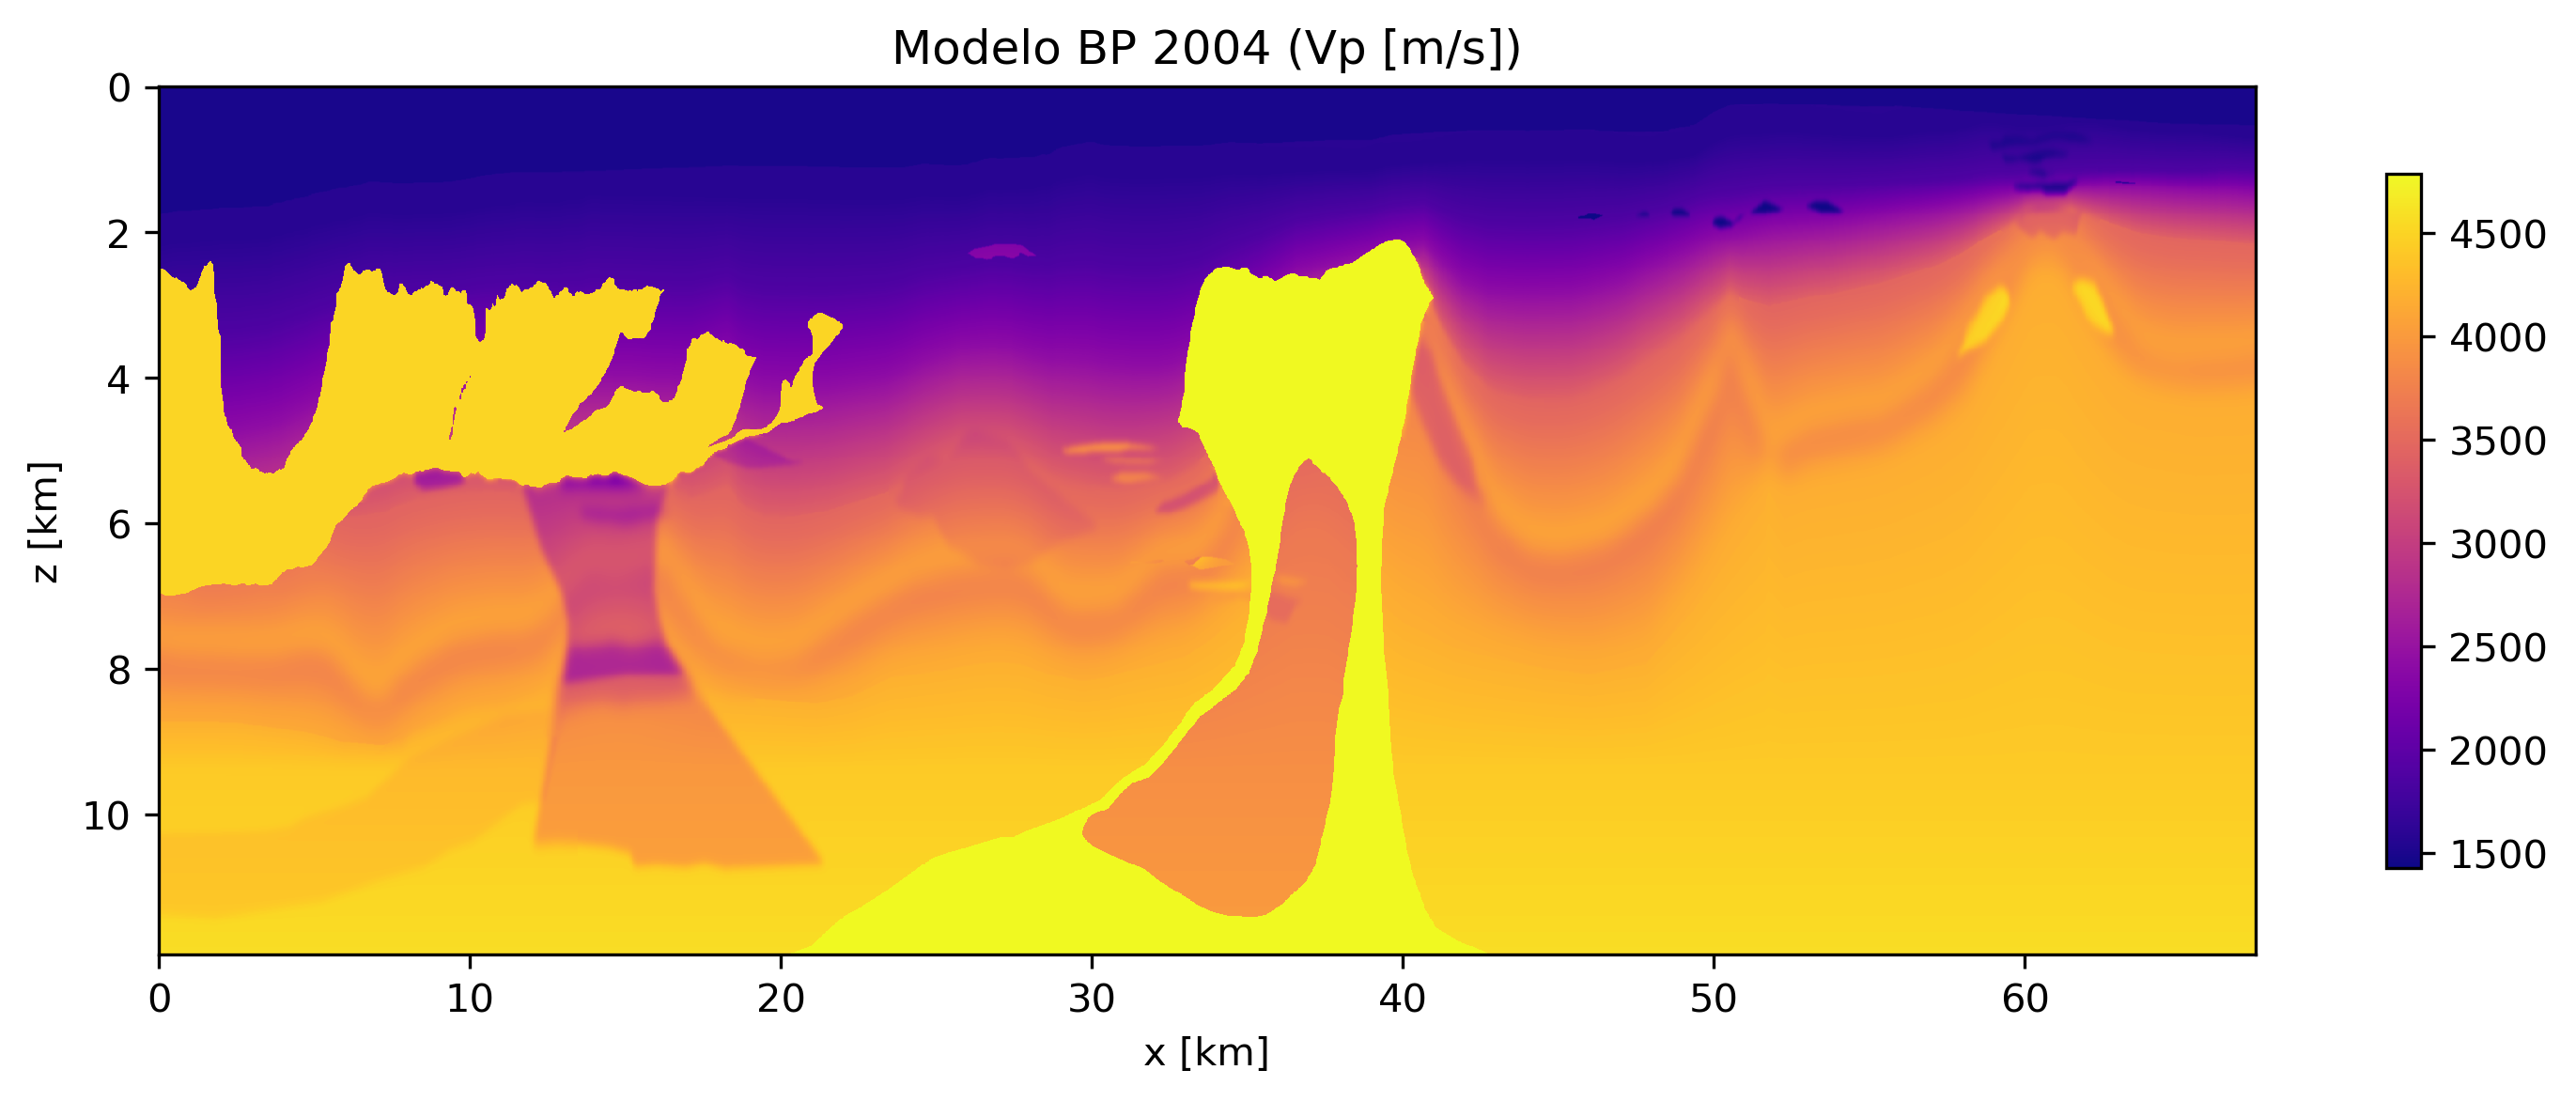

In [10]:
fig = plt.figure(figsize=(12, 4))

plt.pcolormesh(xv, zv, vel_, cmap='plasma')
plt.gca().invert_yaxis()
plt.colorbar(shrink=.8)
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title('Modelo BP 2004 (Vp [m/s])')
fig.set_dpi(300)
plt.show()

___
## Modelo Marmousi2 (Vp)

### Descripción del modelo
Coordenadas
- East - West $\to 17 \space km$
- Depth $\to 3.5 \space km$

Intervalos de la malla
- East - West $\to 6.25 \space m$
- Depth $\to 5.0 \space m$

Tamano de la malla
- $X \to 2721$
- $Z \to 701$

### Lectura del archivo MAT

In [11]:
f = loadmat('marmousi2/MarmousiModel2 little.mat')

In [12]:
sorted(f.keys())

['Density',
 'IP',
 'IS',
 'Vp',
 'Vs',
 '__globals__',
 '__header__',
 '__version__',
 'seismic',
 'wavelet']

In [13]:
vel = f['Vp']

In [14]:
vel.shape

(701, 2721)

### Se exporta en formato Numpy

In [15]:
np.save(arr=vel, file='vmz/Marmousi2.npy')

In [16]:
xkm, zkm = 17., 3.5
append = pd.Series({'Nombre':'Marmousi2','x[km]':xkm,'z[km]':zkm})
df = pd.concat([df, append.to_frame().T], ignore_index=True)

### Visualización del modelo

In [17]:
dx, dy = xkm/vel.shape[1], zkm/vel.shape[0]
x, z = dx*np.arange(vel.shape[1]), dy*np.arange(vel.shape[0])
xv, zv = np.meshgrid(x,z)

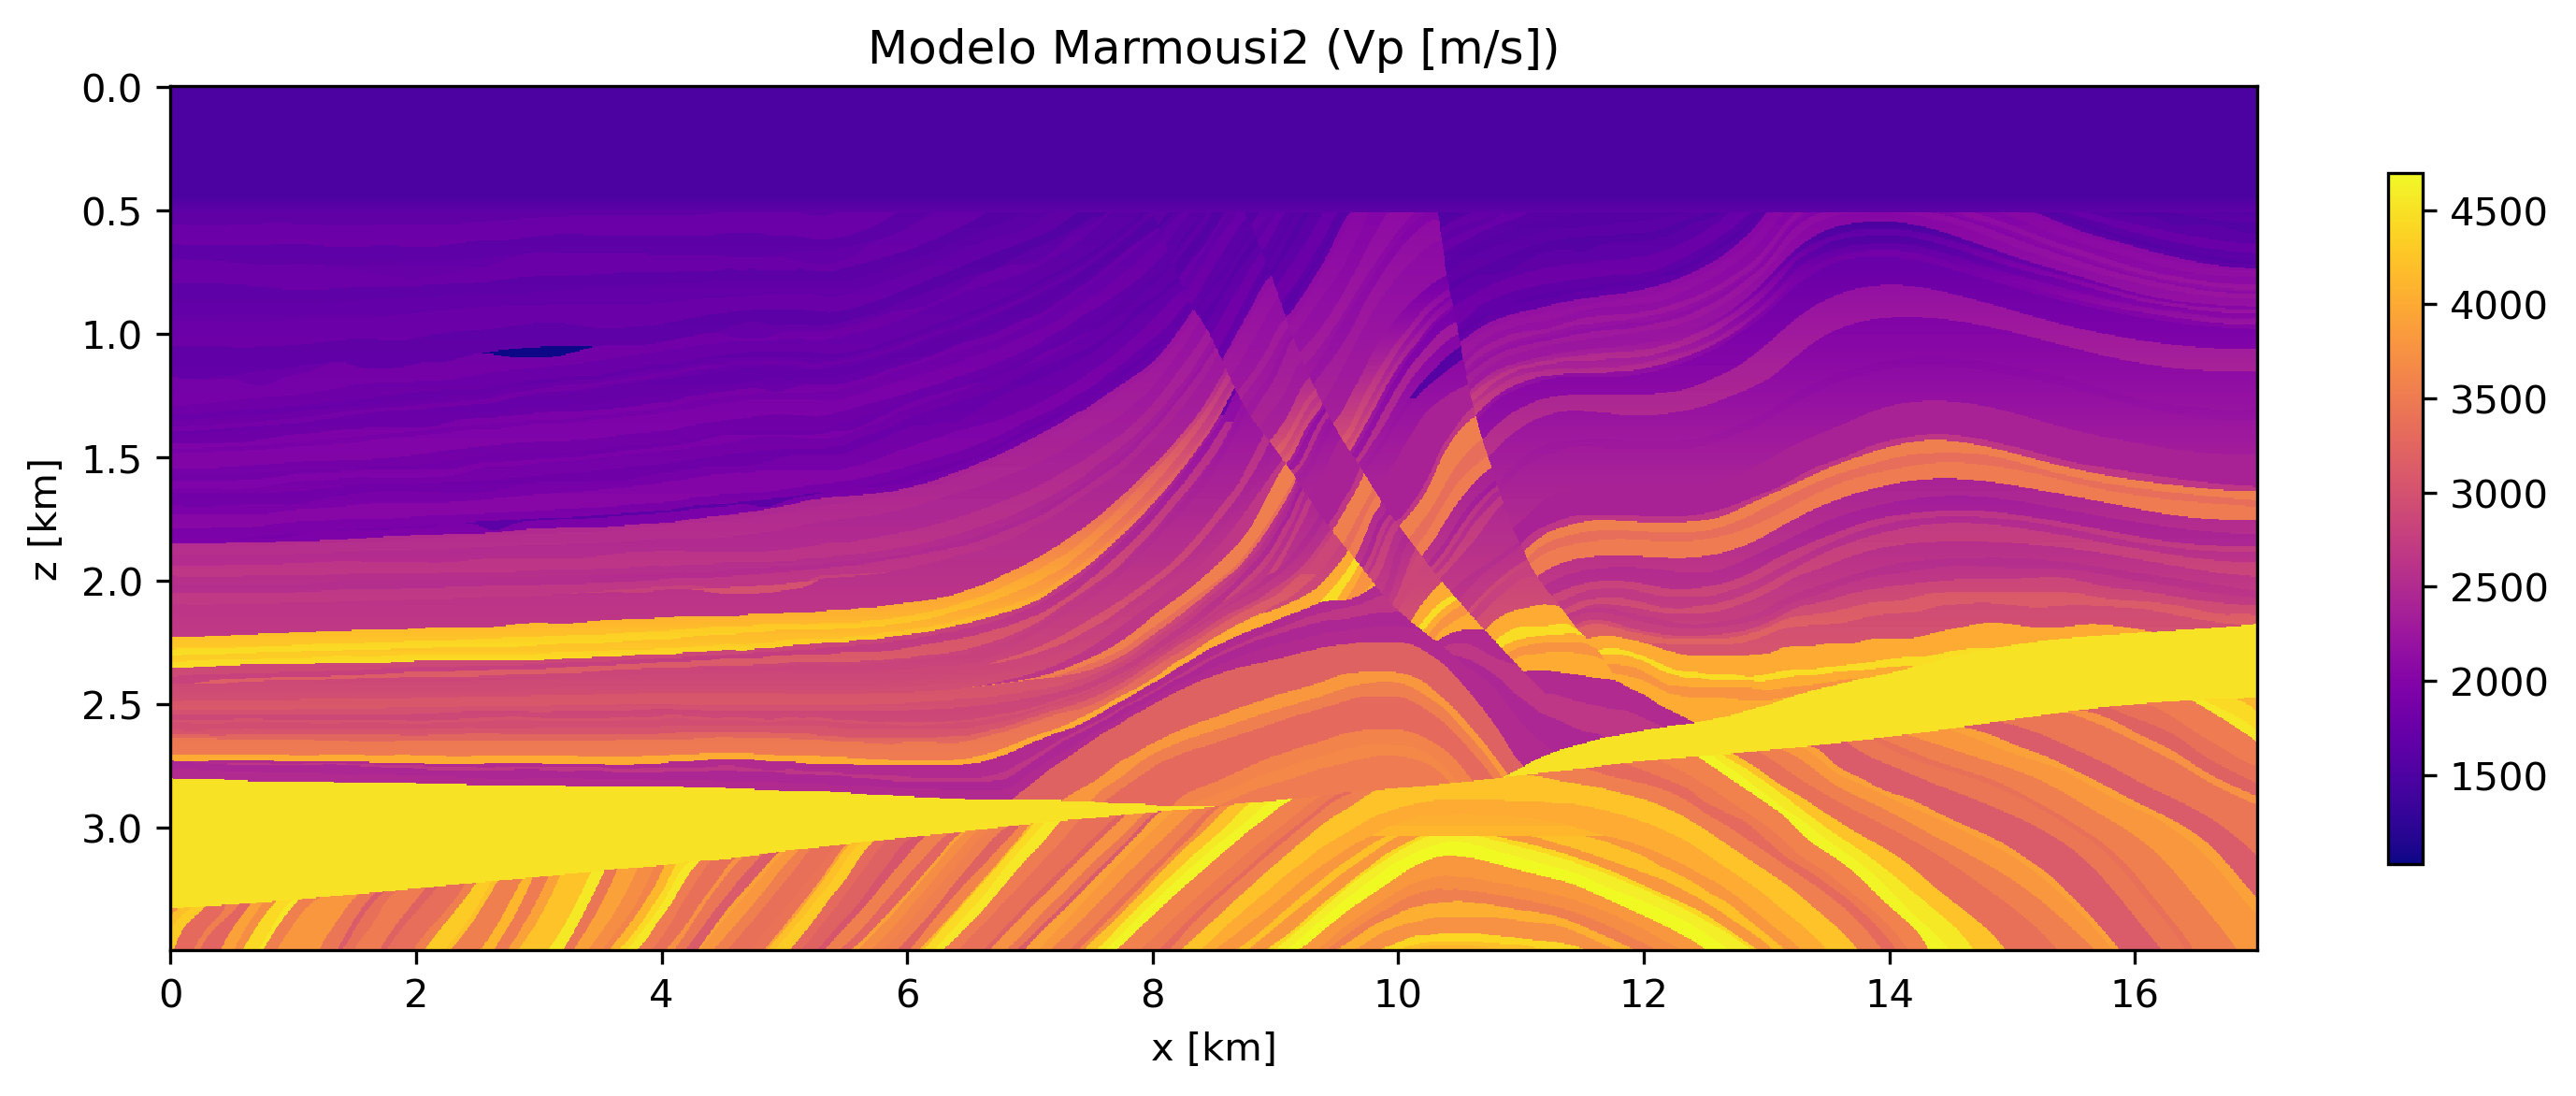

In [18]:
fig = plt.figure(figsize=(12, 4))

plt.pcolormesh(xv, zv, vel, cmap='plasma')
plt.gca().invert_yaxis()
plt.colorbar(shrink=.8)
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title('Modelo Marmousi2 (Vp [m/s])')
fig.set_dpi(300)
plt.show()

___
## Modelo SEAM N23900 (Vp)

### Descripción del modelo
Coordenadas
- East - West $\to 35 \space km$
- Depth $\to 15 \space km$

Intervalos de la malla
- East - West $\to 20.0 \space m$
- Depth $\to 10.0 \space m$

Tamano de la malla
- $X \to 1751$
- $Z \to 1501$

### Lectura del archivo SEG-Y

In [19]:
with segyio.open('seam/SEAM_Vp_Elastic_N23900.sgy', strict=False) as s:
    vel = np.stack(t.astype(float) for t in s.trace)

c:\Users\CR_98\miniconda3\envs\main1\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [20]:
vel.shape

(1751, 1501)

In [21]:
vel = vel.T
vel.shape

(1501, 1751)

### Se exporta en formato Numpy

In [22]:
np.save(arr=vel, file='vmz/SEAM.npy')

In [23]:
xkm, zkm = 35., 15.
append = pd.Series({'Nombre':'SEAM','x[km]':xkm,'z[km]':zkm})
df = pd.concat([df, append.to_frame().T], ignore_index=True)

### Visualización del modelo

In [24]:
dx, dy = xkm/vel.shape[1], zkm/vel.shape[0]
x, z = dx*np.arange(vel.shape[1]), dy*np.arange(vel.shape[0])
xv, zv = np.meshgrid(x,z)

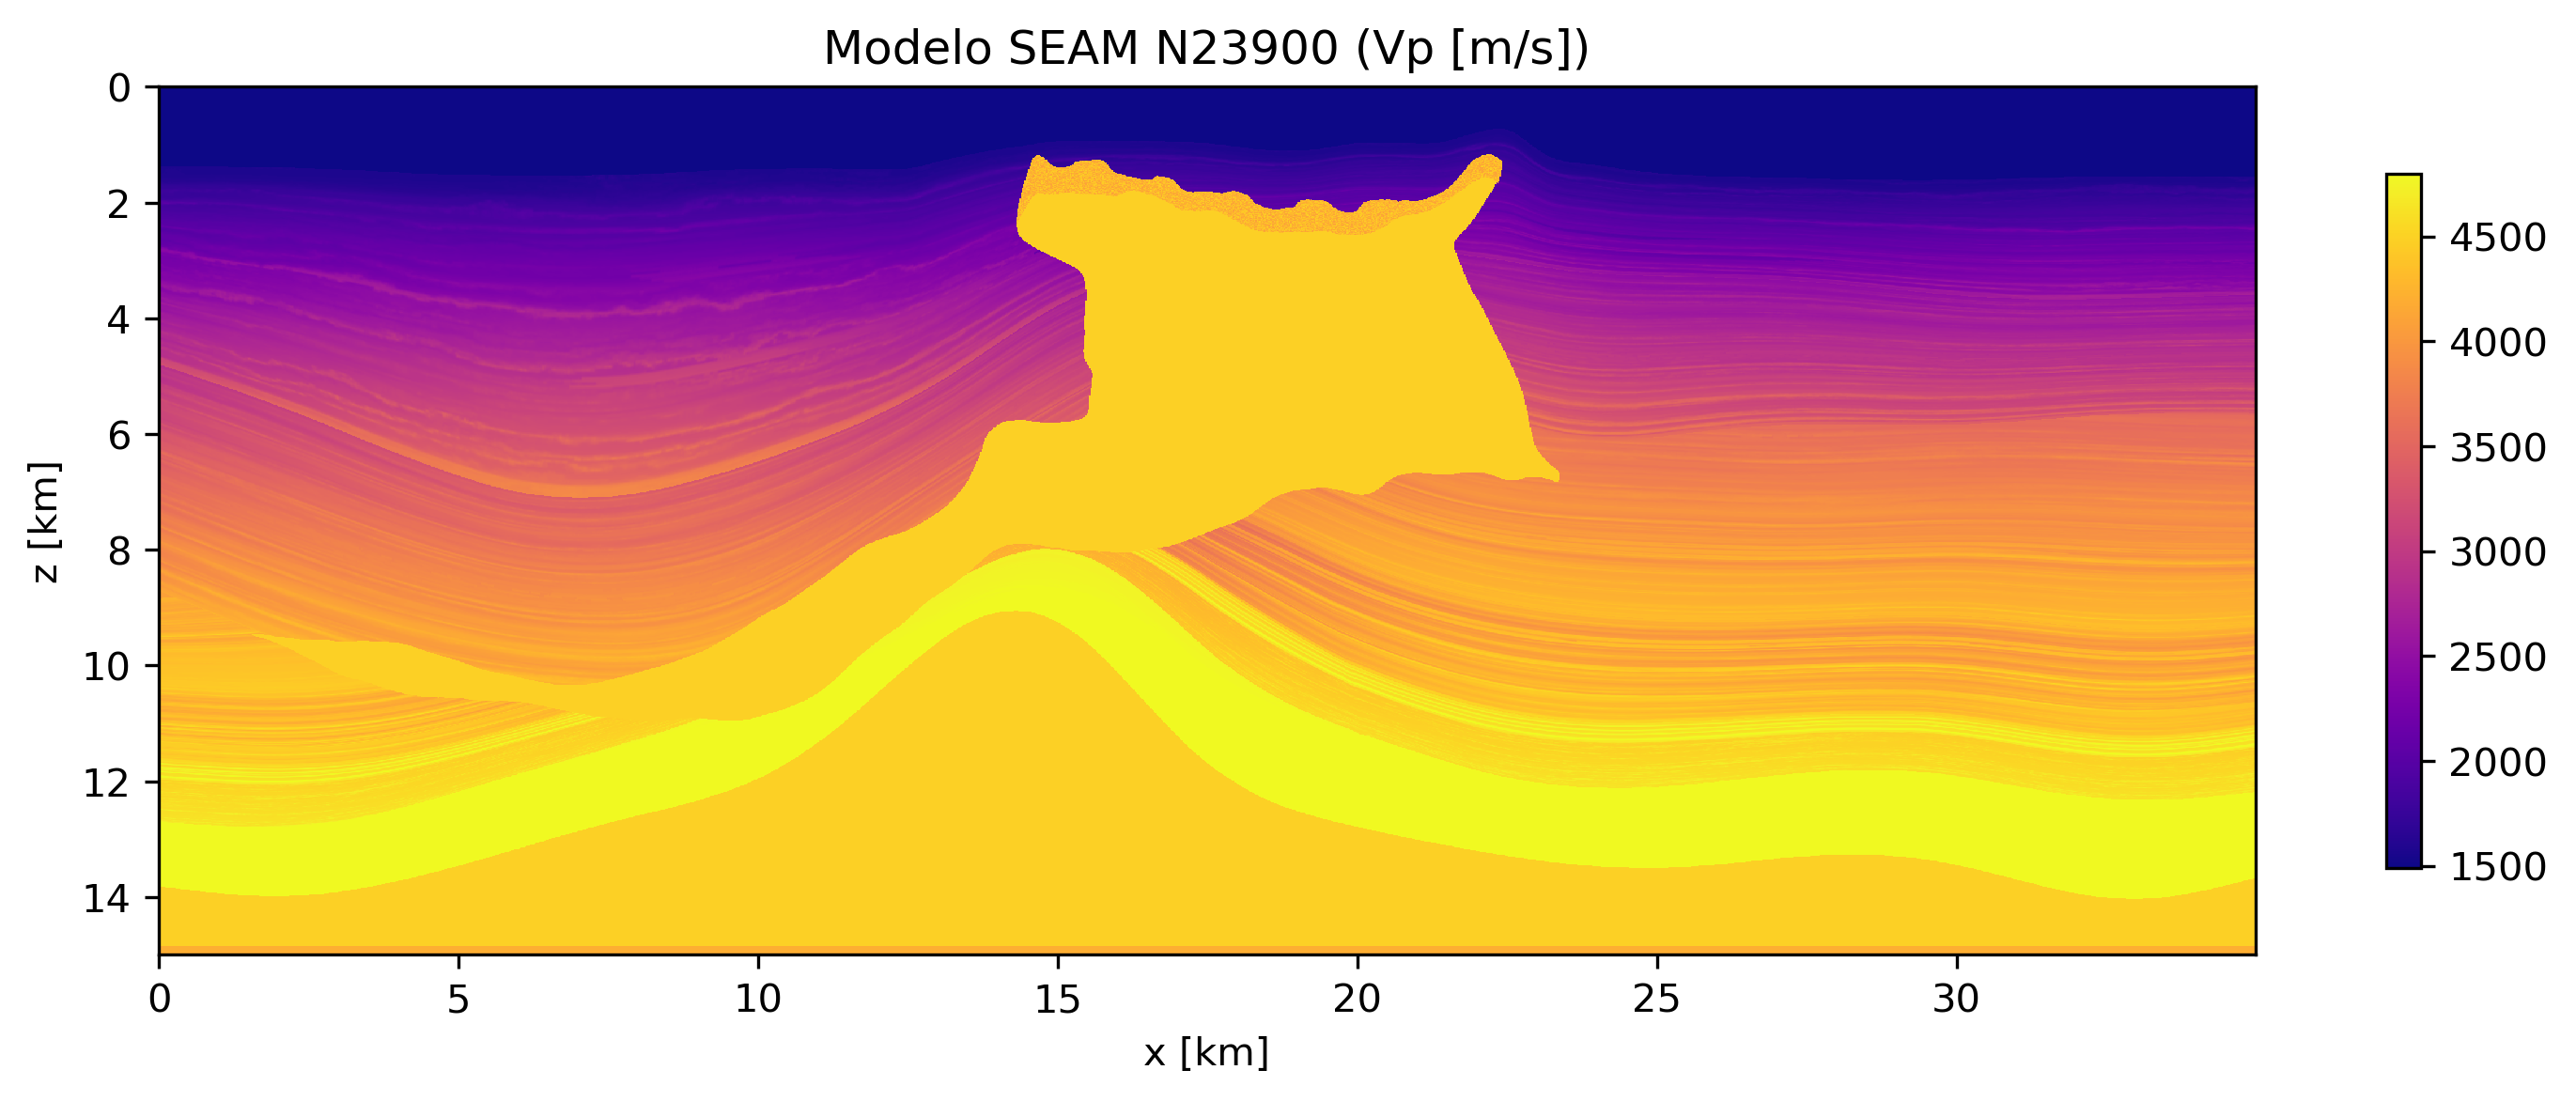

In [25]:
fig = plt.figure(figsize=(12, 4))

plt.pcolormesh(xv, zv, vel, cmap='plasma')
plt.gca().invert_yaxis()
plt.colorbar(shrink=.8)
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title('Modelo SEAM N23900 (Vp [m/s])')
fig.set_dpi(300)
plt.show()

___
## Modelo Pluto1.5 - SMAART

### Descripción del modelo
Coordenadas
- East - West $\to 32 \space km$
- Depth $\to 9.144 \space km$

Intervalos de la malla
- East - West $\to 4.6 \space m$
- Depth $\to 7.62 \space m$

Tamano de la malla
- $X \to 6960$
- $Z \to 1201$

### Lectura del archivo SEG-Y

In [26]:
with segyio.open('smaart/pluto1.5int_depth_vp.sgy', strict=False) as s:
    vel = np.stack(t.astype(float) for t in s.trace)

c:\Users\CR_98\miniconda3\envs\main1\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [27]:
vel.shape

(6960, 1201)

In [28]:
vel = vel.T
vel *= 0.3048 # Se convierte la velocidad de ft/s a m/s
vel.shape

(1201, 6960)

In [29]:
vel_ = zoom(vel, (1/2, 1/2))
vel_.shape

(600, 3480)

### Se exporta en formato Numpy

In [30]:
np.save(arr=vel_, file='vmz/Pluto1.5.npy')

In [31]:
xkm, zkm = 32., 9.144
append = pd.Series({'Nombre':'Pluto1.5','x[km]':xkm,'z[km]':zkm})
df = pd.concat([df, append.to_frame().T], ignore_index=True)

### Visualización del modelo

In [32]:
dx, dy = xkm/vel_.shape[1], zkm/vel_.shape[0]
x, z = dx*np.arange(vel_.shape[1]), dy*np.arange(vel_.shape[0])
xv, zv = np.meshgrid(x,z)

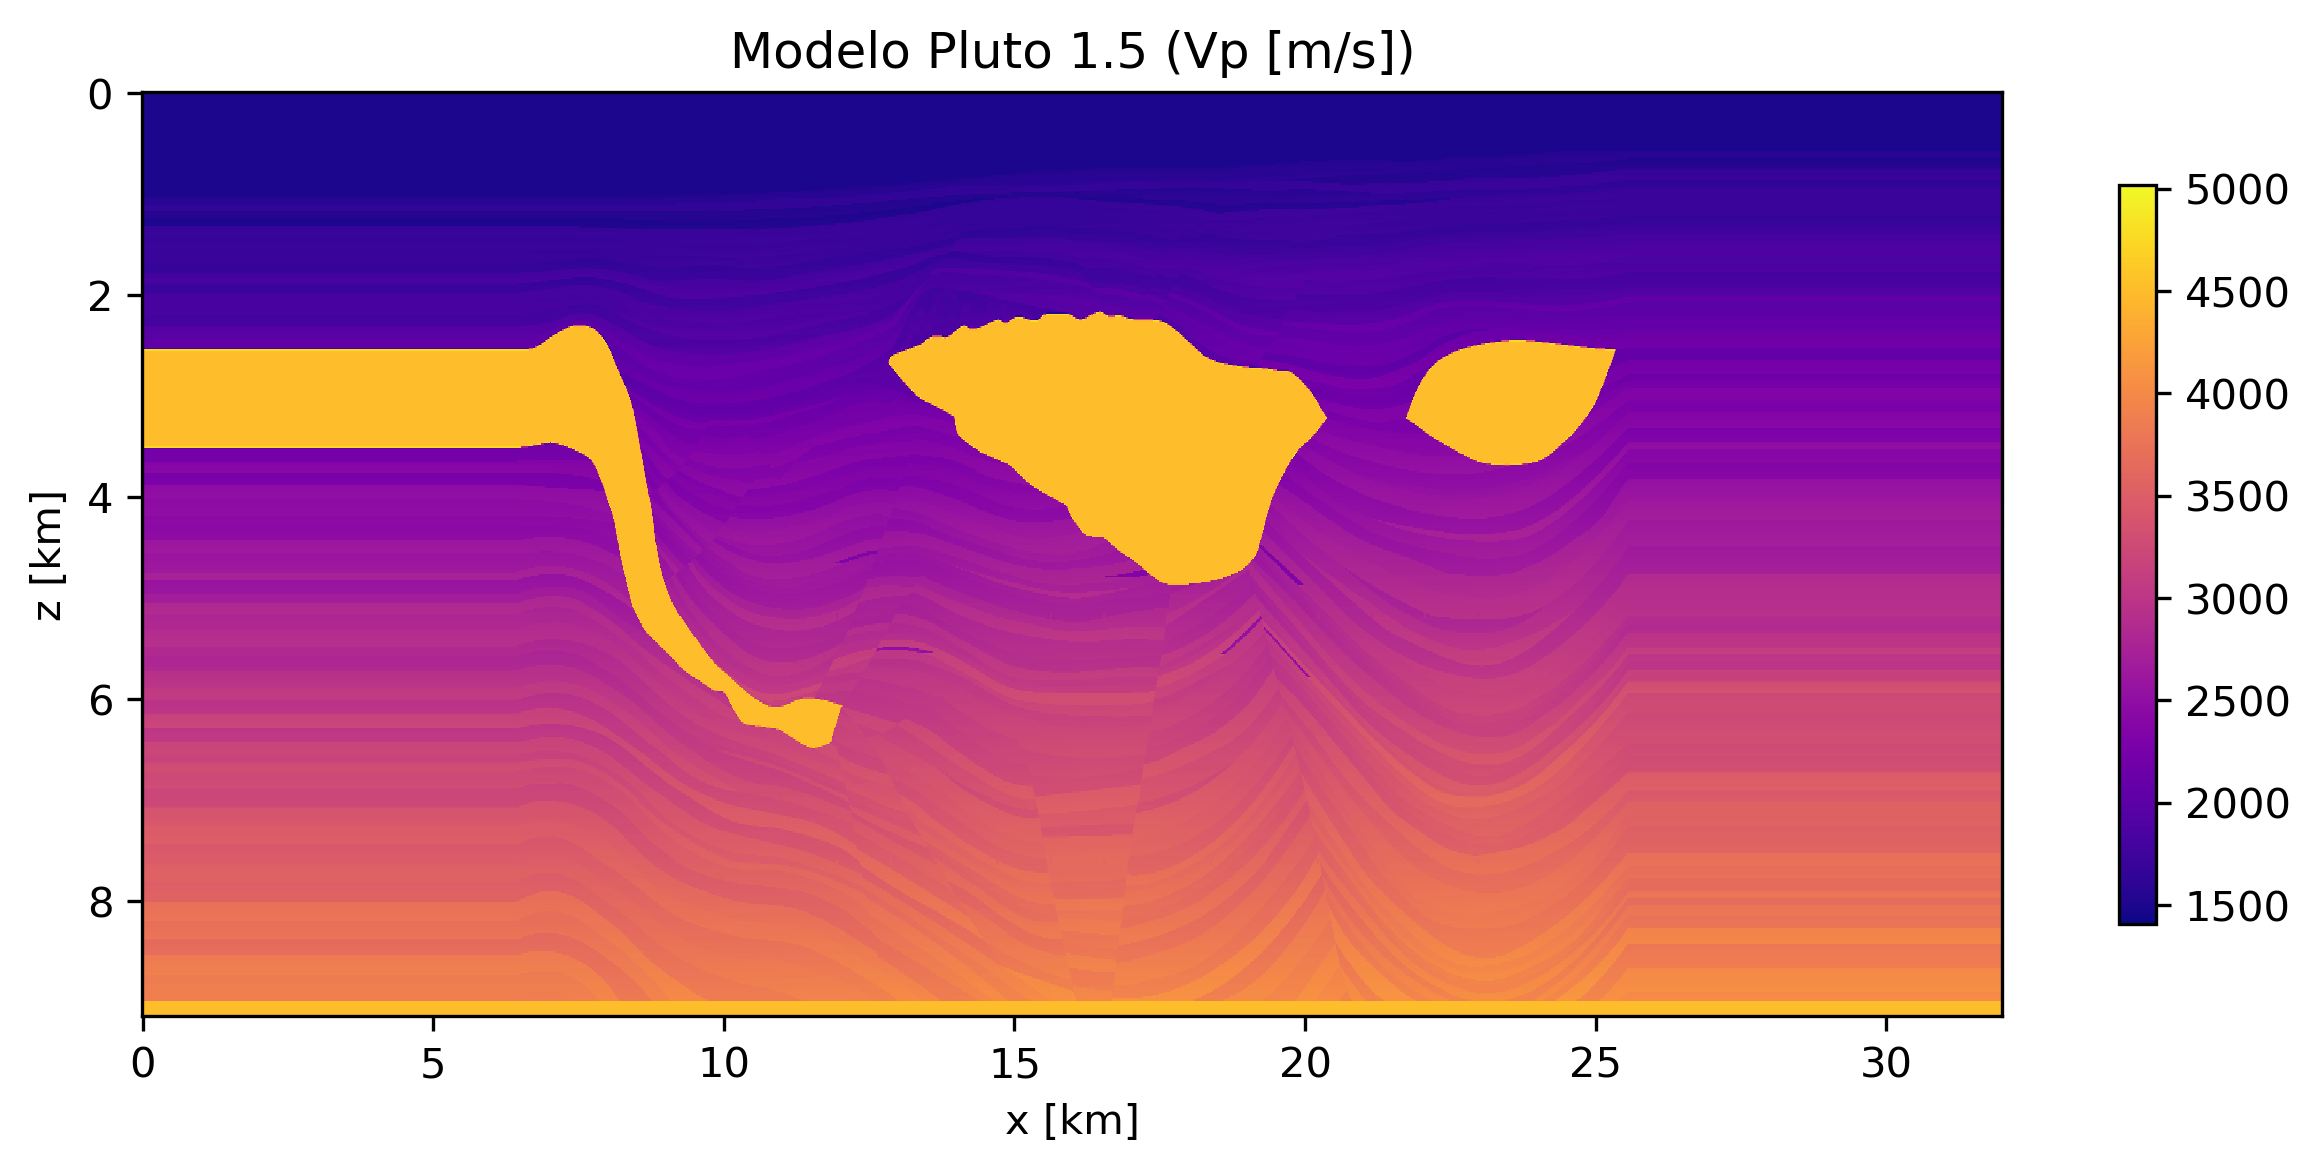

In [33]:
fig = plt.figure(figsize=(10, 4))

plt.pcolormesh(xv, zv, vel_, cmap='plasma')
plt.gca().invert_yaxis()
plt.colorbar(shrink=.8)
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title('Modelo Pluto 1.5 (Vp [m/s])')
fig.set_dpi(300)
plt.show()

___
## Modelo Sigsbee2A - SMAART

### Descripción del modelo
Coordenadas
- East - West $\to 27.432 \space km$
- Depth $\to 9.144 \space km$

Intervalos de la malla
- East - West $\to 12.86 \space m$
- Depth $\to 7.62 \space m$

Tamano de la malla
- $X \to 2133$
- $Z \to 1201$

### Lectura del archivo SEG-Y

In [34]:
with segyio.open('smaart/sigsbee2a_migvel.sgy', strict=False) as s:
    vel = np.stack(t.astype(float) for t in s.trace)

c:\Users\CR_98\miniconda3\envs\main1\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [35]:
vel.shape

(2133, 1201)

In [36]:
vel = vel.T
vel *= 0.3048 # Se convierte la velocidad de ft/s a m/s
vel.shape

(1201, 2133)

### Se exporta en formato Numpy

In [37]:
np.save(arr=vel, file='vmz/Sigsbee2A.npy')

In [38]:
xkm, zkm = 27.432, 9.144
append = pd.Series({'Nombre':'Sigsbee2A','x[km]':xkm,'z[km]':zkm})
df = pd.concat([df, append.to_frame().T], ignore_index=True)

### Visualización del modelo

In [39]:
dx, dy = xkm/vel.shape[1], zkm/vel.shape[0]
x, z = dx*np.arange(vel.shape[1]), dy*np.arange(vel.shape[0])
xv, zv = np.meshgrid(x,z)

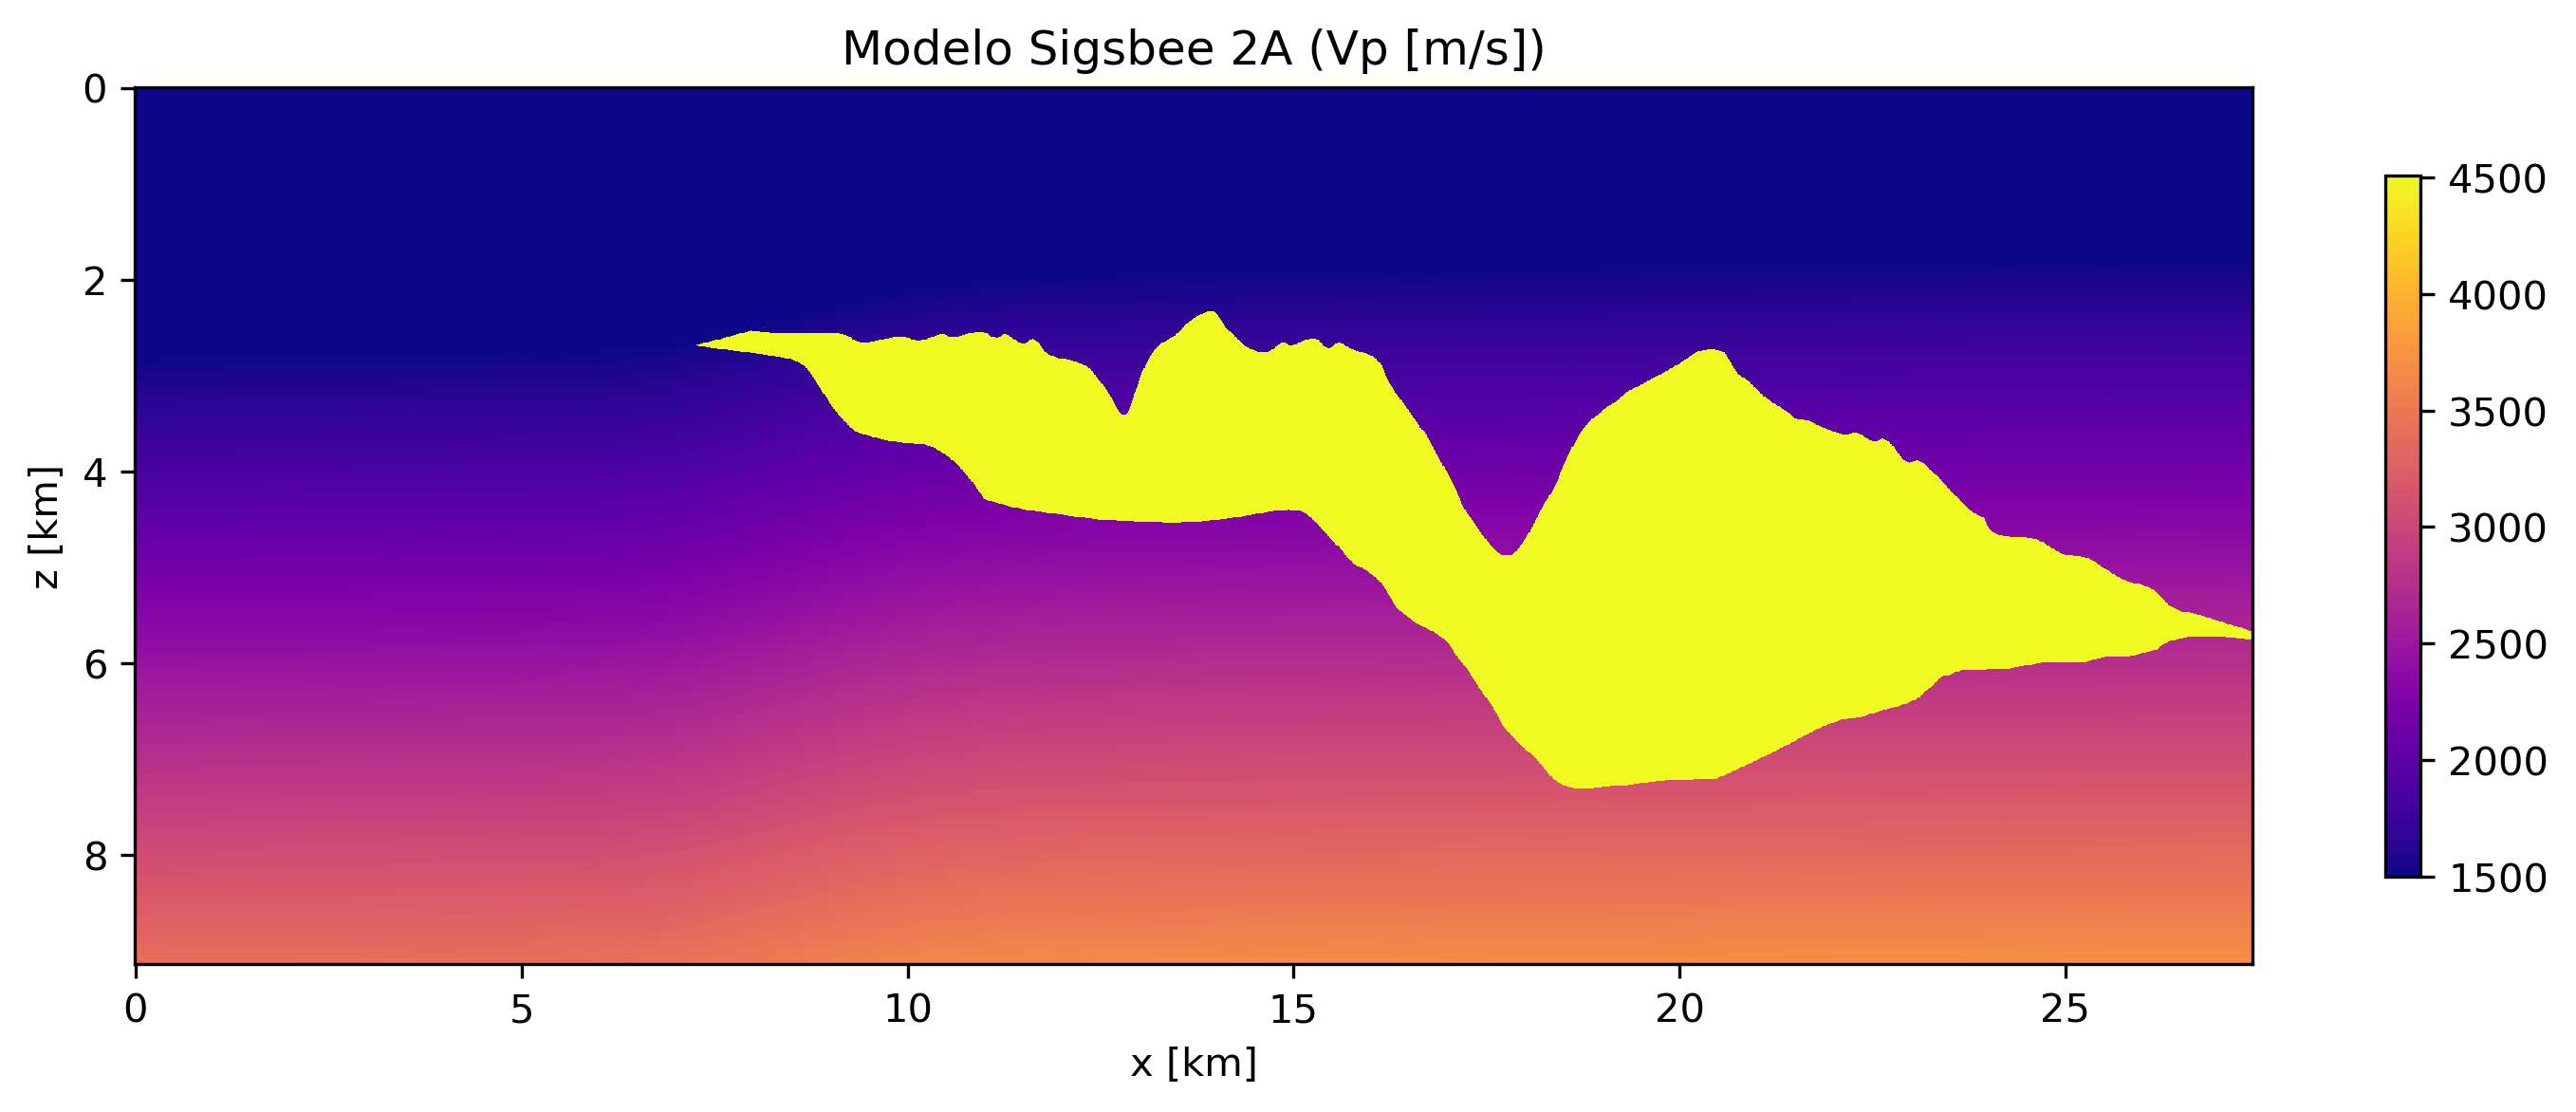

In [40]:
fig = plt.figure(figsize=(12, 4))

plt.pcolormesh(xv, zv, vel, cmap='plasma')
plt.gca().invert_yaxis()
plt.colorbar(shrink=.8)
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title('Modelo Sigsbee 2A (Vp [m/s])')
fig.set_dpi(300)
plt.show()

___
## Modelo Sigsbee2B - SMAART

### Descripción del modelo
Coordenadas
- East - West $\to 27.432 \space km$
- Depth $\to 9.144 \space km$

Intervalos de la malla
- East - West $\to 12.86 \space m$
- Depth $\to 7.62 \space m$

Tamano de la malla
- $X \to 2133$
- $Z \to 1201$

### Lectura del archivo SEG-Y

In [41]:
with segyio.open('smaart/sigsbee2b_migration_velocity.segy', strict=False) as s:
    vel = np.stack(t.astype(float) for t in s.trace)

c:\Users\CR_98\miniconda3\envs\main1\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [42]:
vel.shape

(2133, 1201)

In [43]:
vel = vel.T
vel *= 0.3048 # Se convierte la velocidad de ft/s a m/s
vel.shape

(1201, 2133)

### Se exporta en formato Numpy

In [44]:
np.save(arr=vel, file='vmz/Sigsbee2B.npy')

In [45]:
xkm, zkm = 27.432, 9.144
append = pd.Series({'Nombre':'Sigsbee2B','x[km]':xkm,'z[km]':zkm})
df = pd.concat([df, append.to_frame().T], ignore_index=True)

### Visualización del modelo

In [46]:
dx, dy = xkm/vel.shape[1], zkm/vel.shape[0]
x, z = dx*np.arange(vel.shape[1]), dy*np.arange(vel.shape[0])
xv, zv = np.meshgrid(x,z)

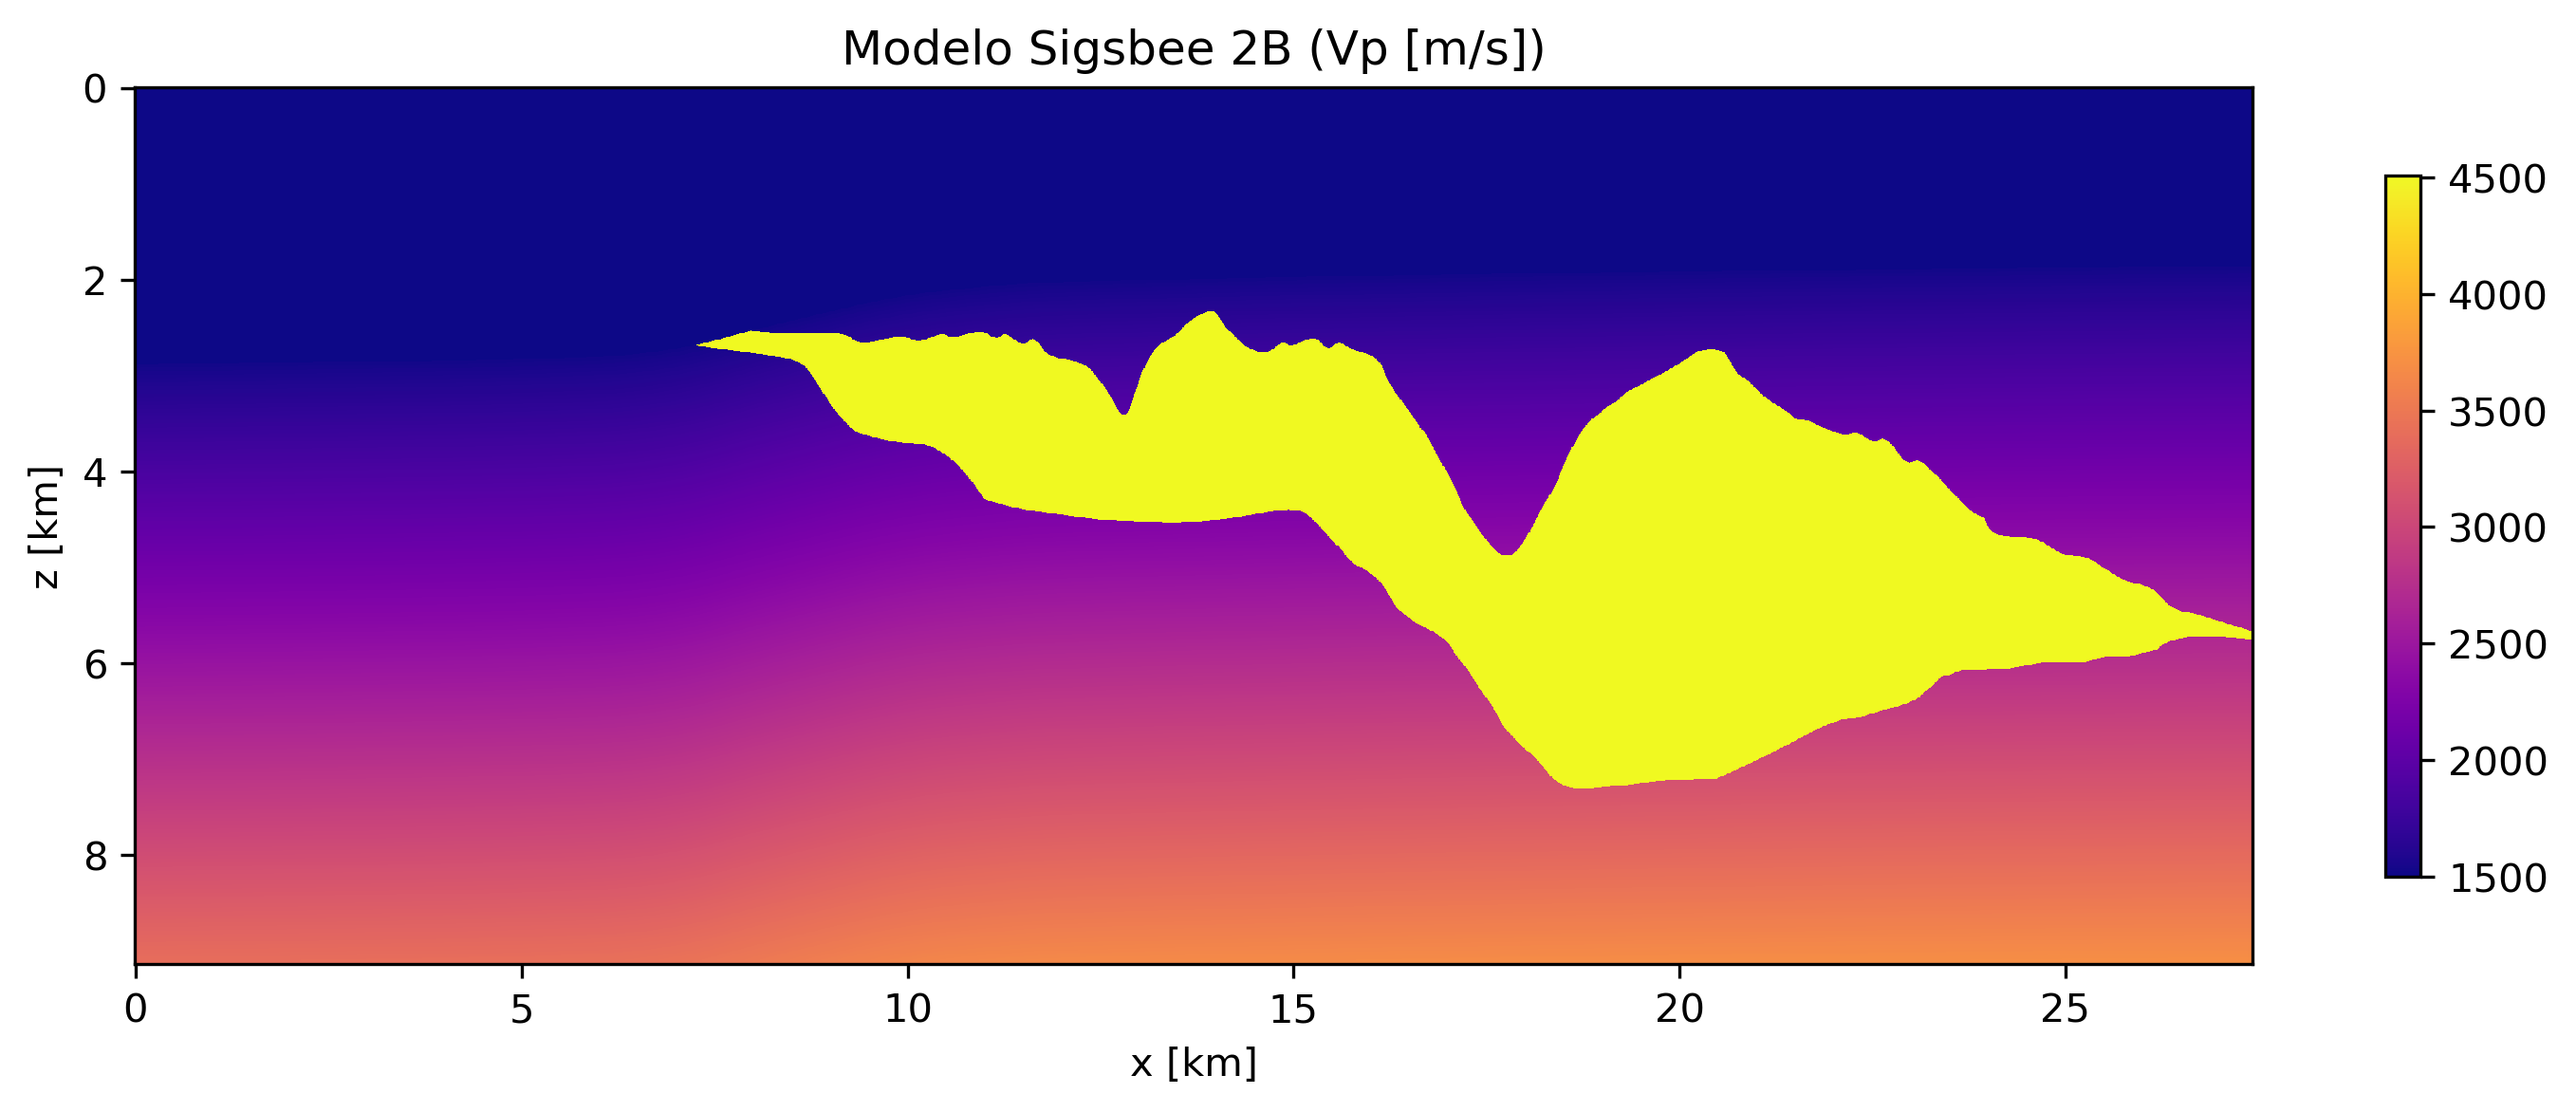

In [47]:
fig = plt.figure(figsize=(12, 4))

plt.pcolormesh(xv, zv, vel, cmap='plasma')
plt.gca().invert_yaxis()
plt.colorbar(shrink=.8)
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title('Modelo Sigsbee 2B (Vp [m/s])')
fig.set_dpi(300)
plt.show()

___
## Modelo Red Sea - KFUMP - KAUST

### Descripción del modelo
Coordenadas
- East - West $\to 11.8 \space km$
- Depth $\to 3.5 \space km$

Intervalos de la malla
- East - West $\to 1.25 \space m$
- Depth $\to 1.25 \space m$

Tamano de la malla
- $X \to 9441 $
- $Z \to 2801 $

### Lectura del archivo SEG-Y

In [48]:
with segyio.open('kfupm/vp_rs.segy', strict=False) as s:
    vel = np.stack(t.astype(float) for t in s.trace)

c:\Users\CR_98\miniconda3\envs\main1\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [49]:
vel.shape

(9441, 2801)

In [50]:
vel = vel.T
vel.shape

(2801, 9441)

In [51]:
vel_ = zoom(vel, (1/2, 1/5))
vel_.shape

(1400, 1888)

### Se exporta en formato Numpy

In [52]:
np.save(arr=vel_, file='vmz/Red-Sea.npy')

In [53]:
xkm, zkm = 11.8, 3.5
append = pd.Series({'Nombre':'Red-Sea','x[km]':xkm,'z[km]':zkm})
df = pd.concat([df, append.to_frame().T], ignore_index=True)

### Visualización del modelo

In [54]:
dx, dy = xkm/vel_.shape[1], zkm/vel_.shape[0]
x, z = dx*np.arange(vel_.shape[1]), dy*np.arange(vel_.shape[0])
xv, zv = np.meshgrid(x,z)

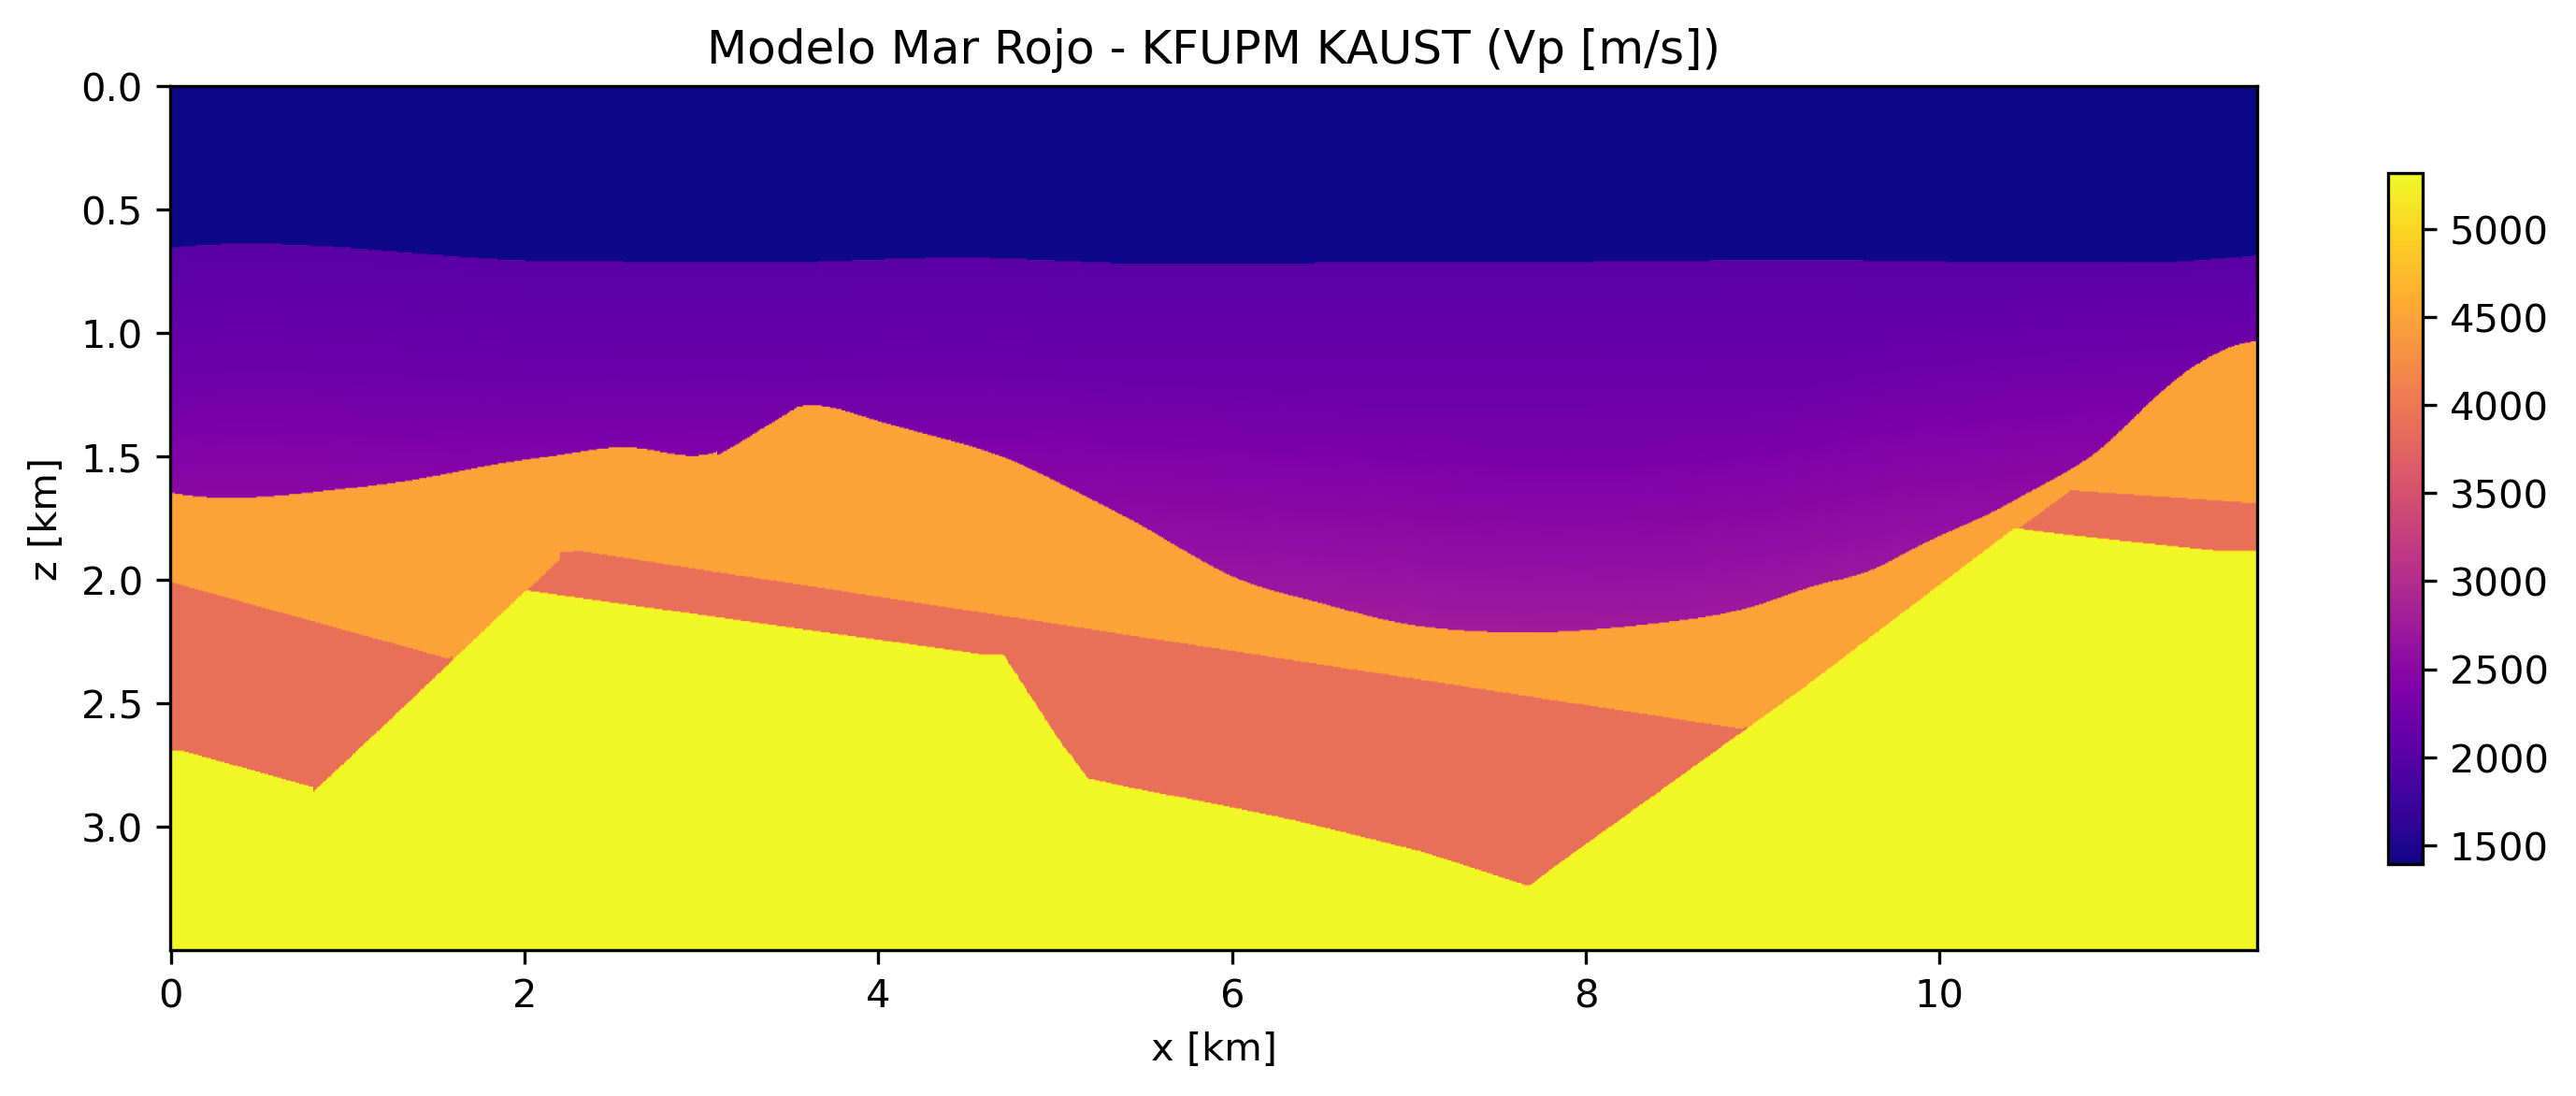

In [55]:
fig = plt.figure(figsize=(12, 4))

plt.pcolormesh(xv, zv, vel_, cmap='plasma')
plt.gca().invert_yaxis()
plt.colorbar(shrink=.8)
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title('Modelo Mar Rojo - KFUPM KAUST (Vp [m/s])')
fig.set_dpi(300)
plt.show()

___
## Modelo Ghawar - KFUMP

### Descripción del modelo
Coordenadas
- East - West $\to 38.4 \space km$
- Depth $\to 5.8 \space km$

Intervalos de la malla
- East - West $\to \approx 1.56 \space m$
- Depth $\to \approx 1.56 \space m$

Tamano de la malla
- $X \to 24545 $
- $Z \to 3719 $

### Lectura del archivo SEG-Y

In [56]:
with segyio.open('kfupm/Ghawar_vp.segy', strict=False) as s:
    vel = np.stack(t.astype(float) for t in s.trace)

c:\Users\CR_98\miniconda3\envs\main1\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [57]:
vel.shape

(24545, 3719)

In [58]:
vel = vel.T
vel.shape

(3719, 24545)

In [59]:
vel_ = zoom(vel, (1/4, 1/10))
vel_.shape

(930, 2454)

### Se exporta en formato Numpy

In [60]:
np.save(arr=vel_, file='vmz/Ghawar.npy')

In [61]:
xkm, zkm = 38.4, 5.8
append = pd.Series({'Nombre':'Ghawar','x[km]':xkm,'z[km]':zkm})
df = pd.concat([df, append.to_frame().T], ignore_index=True)

### Visualización del modelo

In [62]:
dx, dy = xkm/vel_.shape[1], zkm/vel_.shape[0]
x, z = dx*np.arange(vel_.shape[1]), dy*np.arange(vel_.shape[0])
xv, zv = np.meshgrid(x,z)

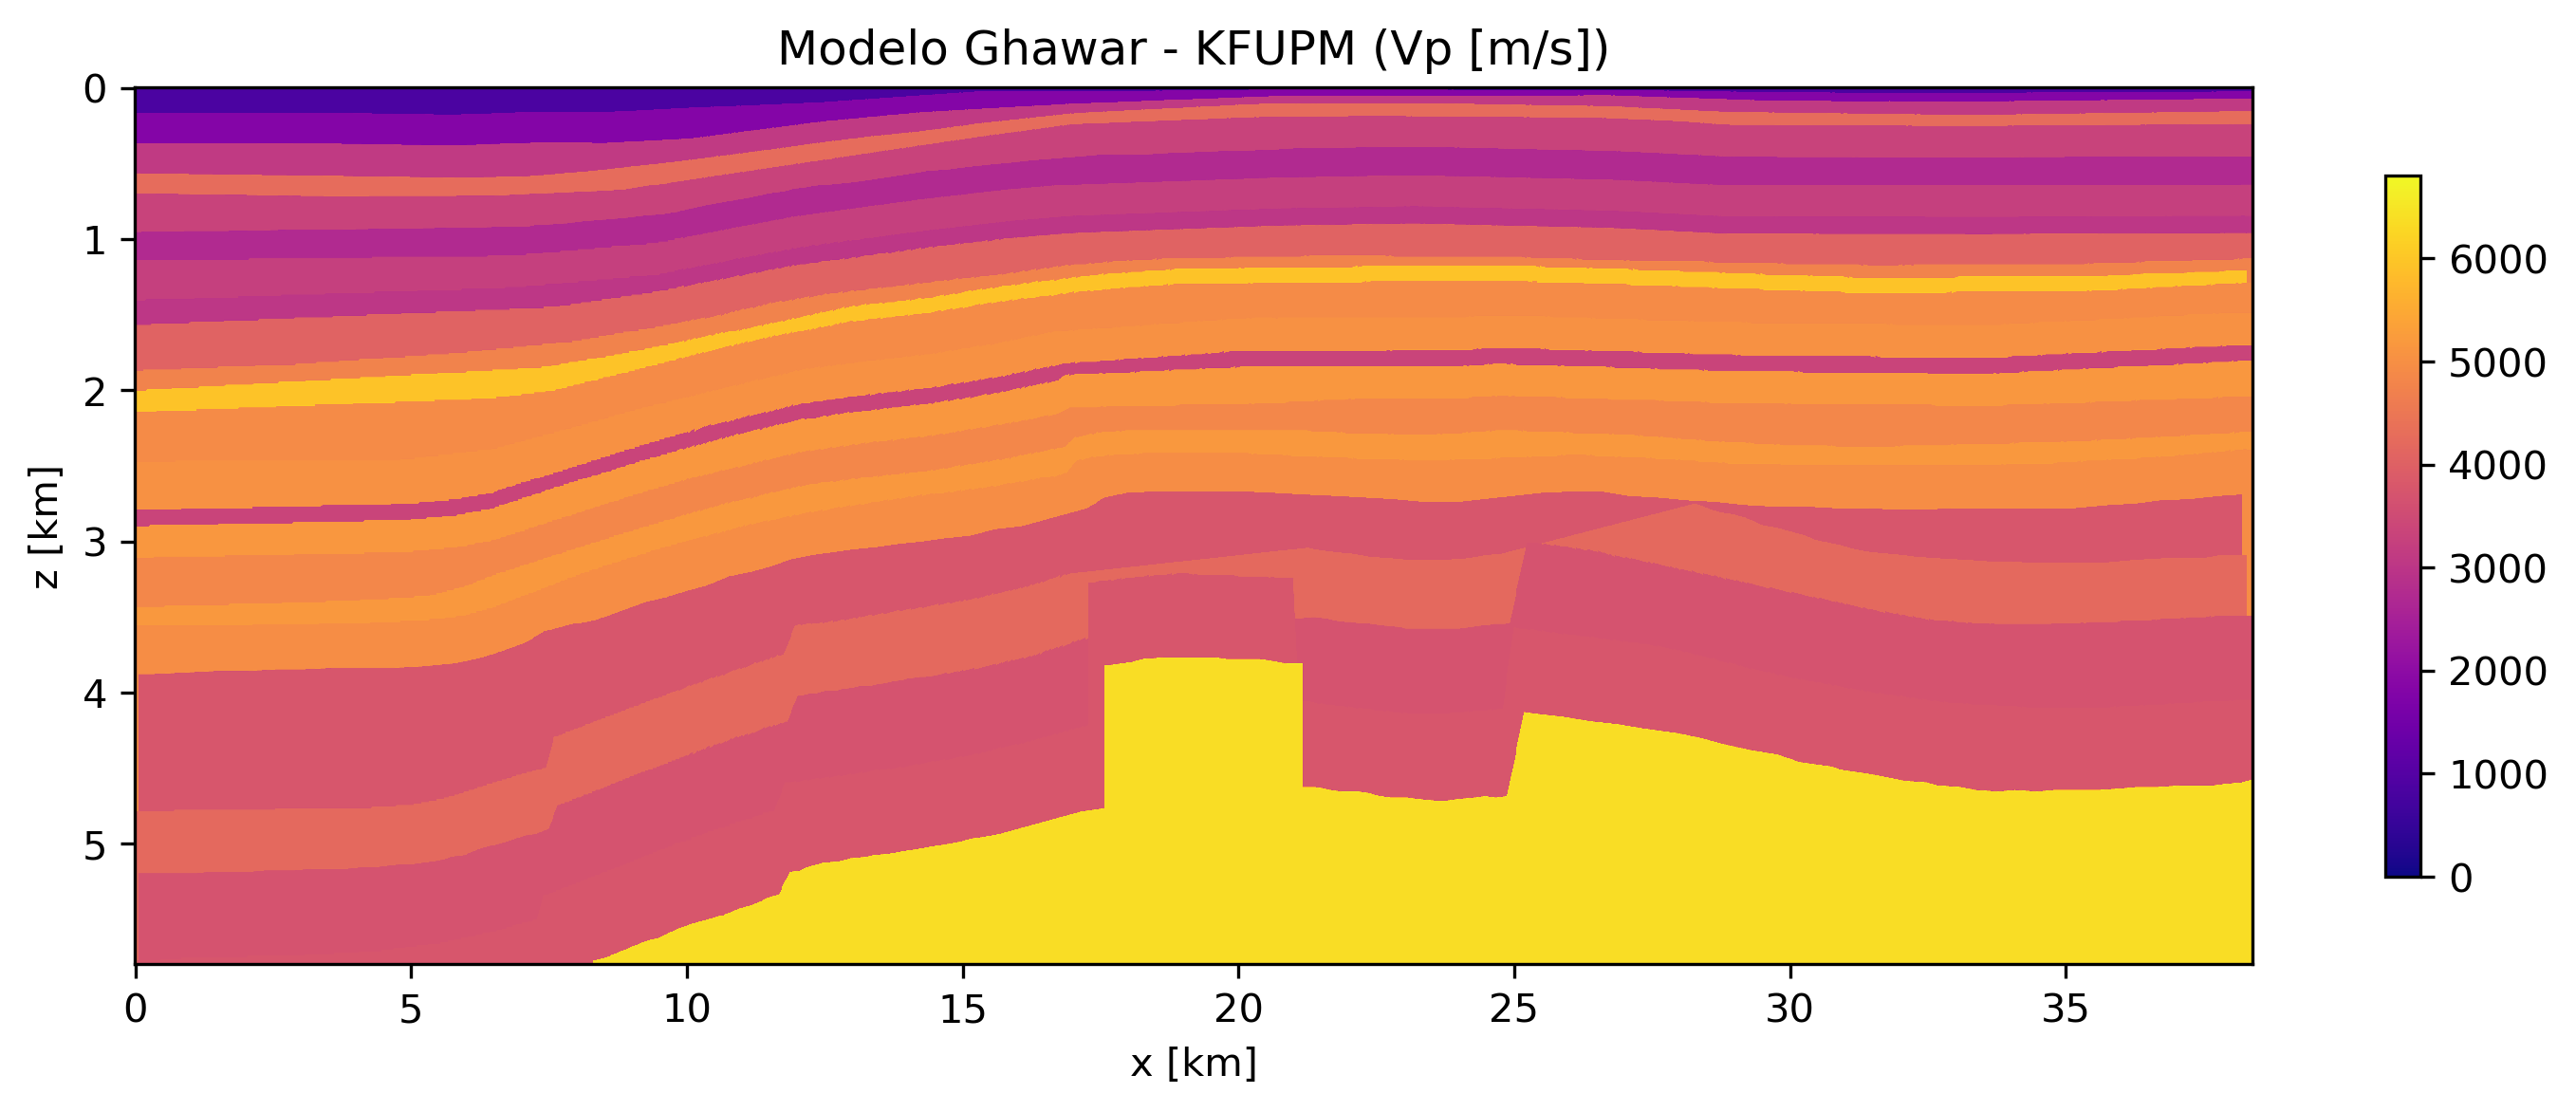

In [63]:
fig = plt.figure(figsize=(12, 4))

plt.pcolormesh(xv, zv, vel_, cmap='plasma')
plt.gca().invert_yaxis()
plt.colorbar(shrink=.8)
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title('Modelo Ghawar - KFUPM (Vp [m/s])')
fig.set_dpi(300)
plt.show()

___
## Modelo 94

### Descripción del modelo
Coordenadas
- East - West $\to 27 \space km$
- Depth $\to 8 \space km$

Intervalos de la malla
- East - West $\to 16.187 \space m$
- Depth $\to 8 \space m$

Tamano de la malla
- $X \to 1668$
- $Z \to 1000$

### Lectura del archivo SEG-Y

In [64]:
with segyio.open('model94/Model94 - velocity.segy', strict=False) as s:
    vel = np.stack(t.astype(float) for t in s.trace)

c:\Users\CR_98\miniconda3\envs\main1\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [65]:
vel.shape

(1668, 1000)

In [66]:
vel = vel.T
vel.shape

(1000, 1668)

### Se exporta en formato Numpy

In [74]:
np.save(arr=vel, file='vmz/Foothills.npy')

In [68]:
xkm, zkm = 27., 8.
append = pd.Series({'Nombre':'Foothills','x[km]':xkm,'z[km]':zkm})
df = pd.concat([df, append.to_frame().T], ignore_index=True)

### Visualización del modelo

In [69]:
dx, dy = xkm/vel.shape[1], zkm/vel.shape[0]
x, z = dx*np.arange(vel.shape[1]), dy*np.arange(vel.shape[0])
xv, zv = np.meshgrid(x,z)

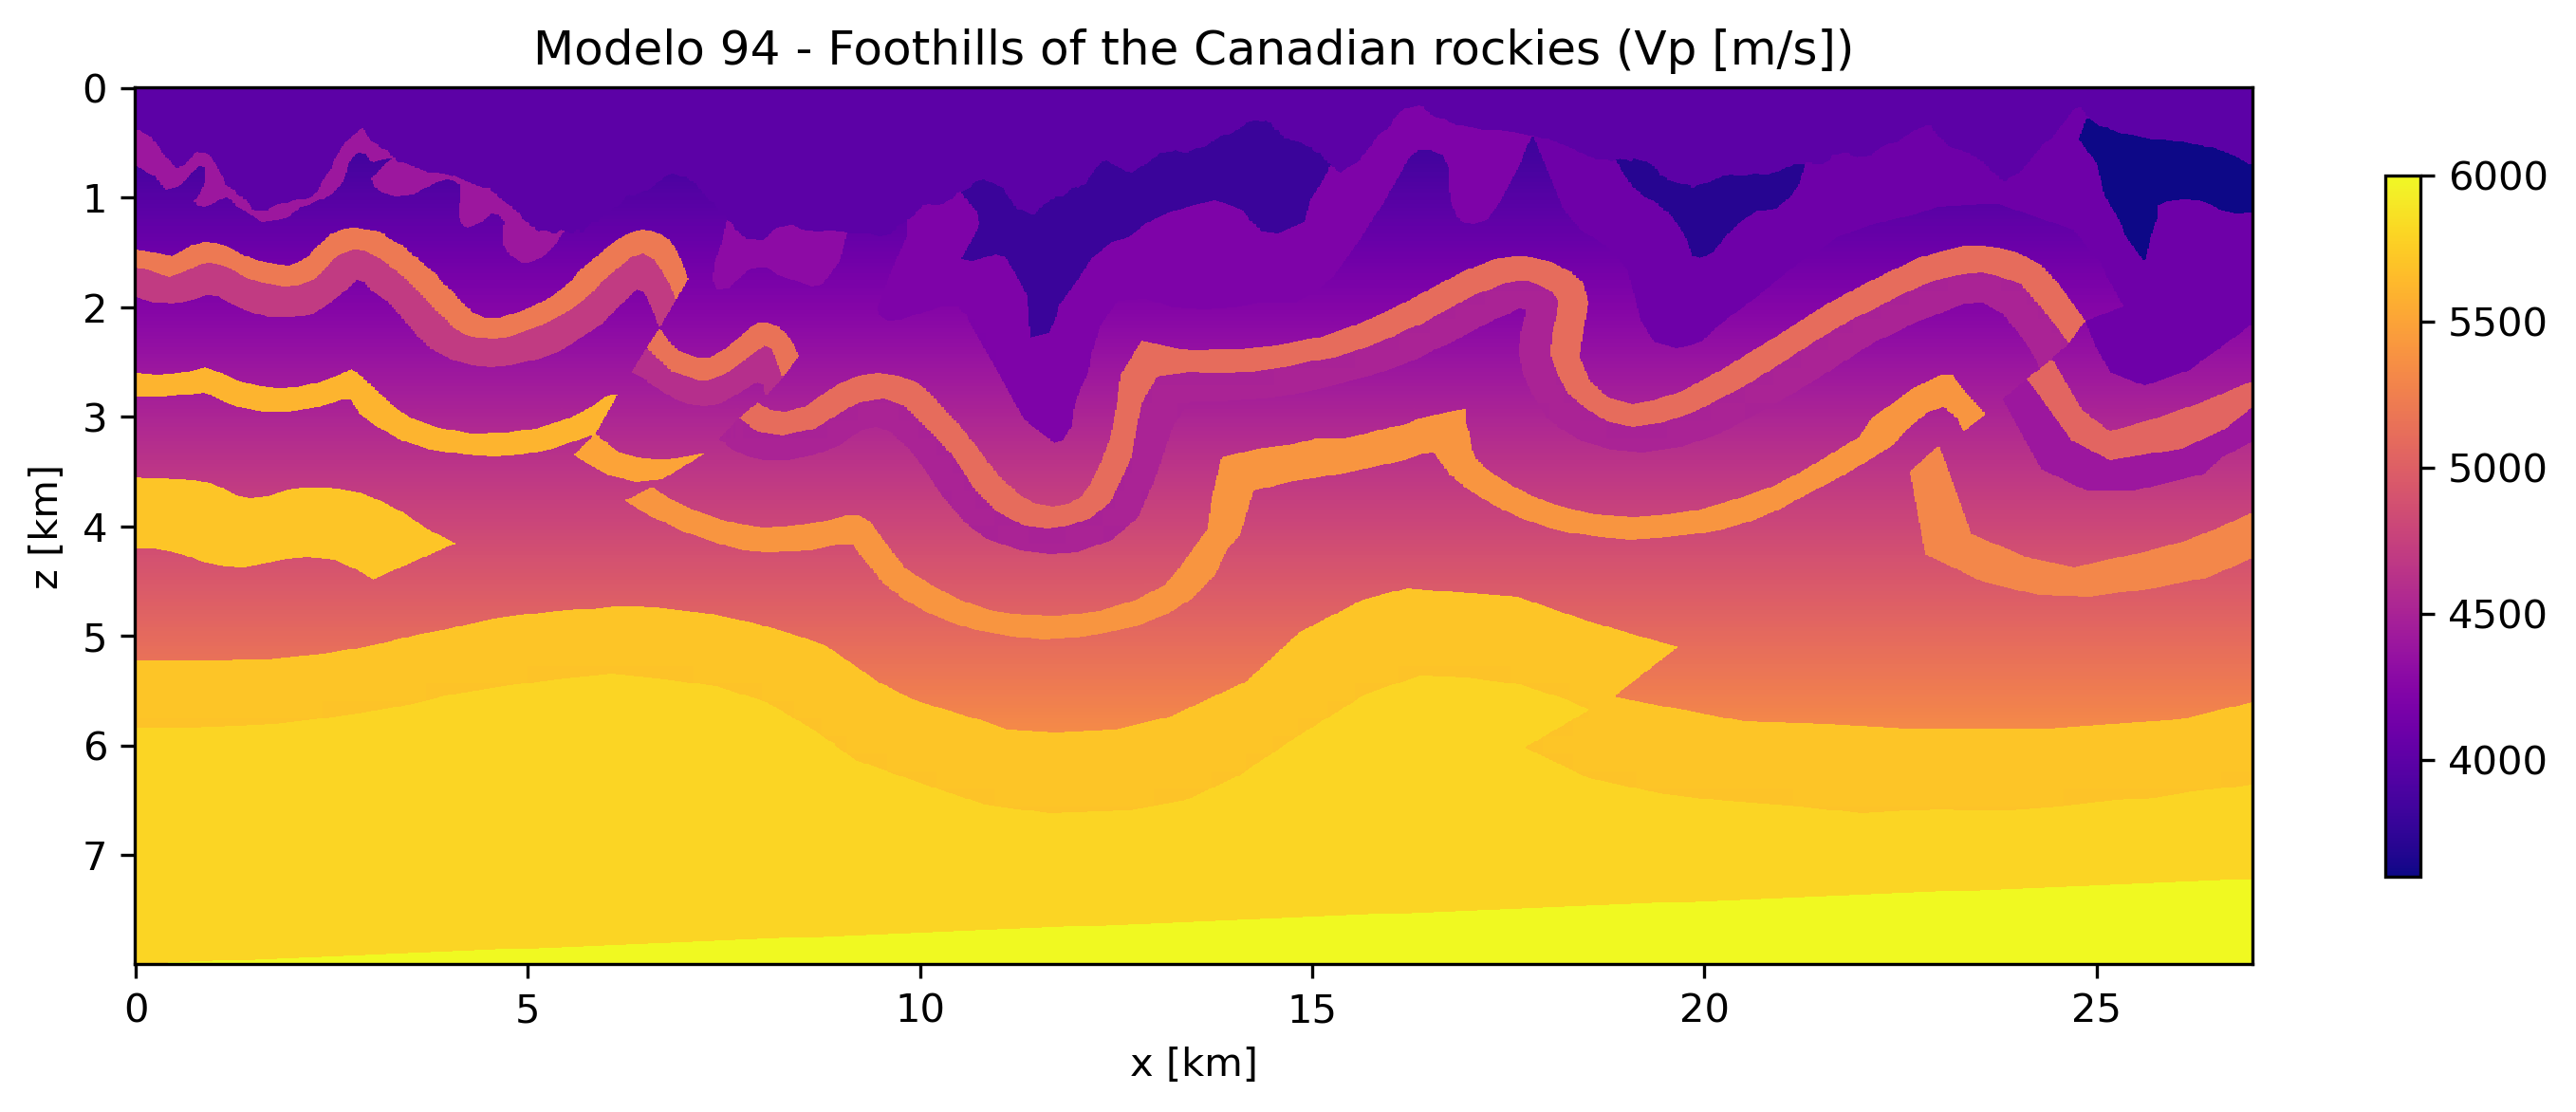

In [70]:
fig = plt.figure(figsize=(12, 4))

plt.pcolormesh(xv, zv, vel, cmap='plasma')
plt.gca().invert_yaxis()
plt.colorbar(shrink=.8)
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title('Modelo 94 - Foothills of the Canadian rockies (Vp [m/s])')
fig.set_dpi(300)
plt.show()

## Tabla de datos

In [71]:
df

,Nombre,x[km],z[km]
0,BP-2004,67.425,11.9375
1,Marmousi2,17.0,3.5
2,SEAM,35.0,15.0
3,Pluto1.5,32.0,9.144
4,Sigsbee2A,27.432,9.144
5,Sigsbee2B,27.432,9.144
6,Red-Sea,11.8,3.5
7,Ghawar,38.4,5.8
8,Foothills,27.0,8.0


In [73]:
df.to_csv('vmz/models.csv', index = False)

## Recursos computacionales

In [72]:
scooby.Report()

--------------------------------------------------------------------------------
  Date: Sun Dec 11 18:18:44 2022 Hora estándar central (México)

                OS : Windows
            CPU(s) : 4
           Machine : AMD64
      Architecture : 64bit
               RAM : 7.9 GiB
       Environment : Jupyter

  Python 3.10.6 | packaged by conda-forge | (main, Oct 24 2022, 16:02:16) [MSC
  v.1916 64 bit (AMD64)]

             numpy : 1.23.5
             scipy : 1.9.3
           IPython : 8.4.0
        matplotlib : 3.6.2
            scooby : 0.7.0

  Intel(R) oneAPI Math Kernel Library Version 2021.4-Product Build 20210904
  for Intel(R) 64 architecture applications
--------------------------------------------------------------------------------